# Frotas de Veiculos no Brasil 2020

## Analises dos dados

---

In [1]:
# Importações de bbliotecas
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura CSVs
df_frota = pd.read_csv('datasets/2020-0311_frota_de_veiculos_tratado.csv',
                       usecols=['UF','MUNICIPIO','TIPO DE VEICULO','QUANTIDADE','DATE'],
                       parse_dates=['DATE'],
                       sep=',')

In [3]:
# Informações gerais
df_frota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001637 entries, 0 to 1001636
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   UF               1001637 non-null  object        
 1   MUNICIPIO        1001637 non-null  object        
 2   TIPO DE VEICULO  1001637 non-null  object        
 3   QUANTIDADE       1001637 non-null  int64         
 4   DATE             1001637 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 38.2+ MB


In [4]:
# Criando MultiIndex e ordenando por UF/MUNICIPIO/DATE
df_frota.set_index(['UF', 'MUNICIPIO', 'DATE', 'TIPO DE VEICULO', 'QUANTIDADE'], inplace=True)
df_frota.sort_values(df_frota.index.names, inplace=True)

### Análises

In [5]:
df_frota_blumenau = df_frota.loc[('SC', 'BLUMENAU', '2020-03-01')]\
                            .reset_index()\
                            .sort_values('QUANTIDADE', ascending=False)
df_AM = df_frota_blumenau.iloc[0:2]

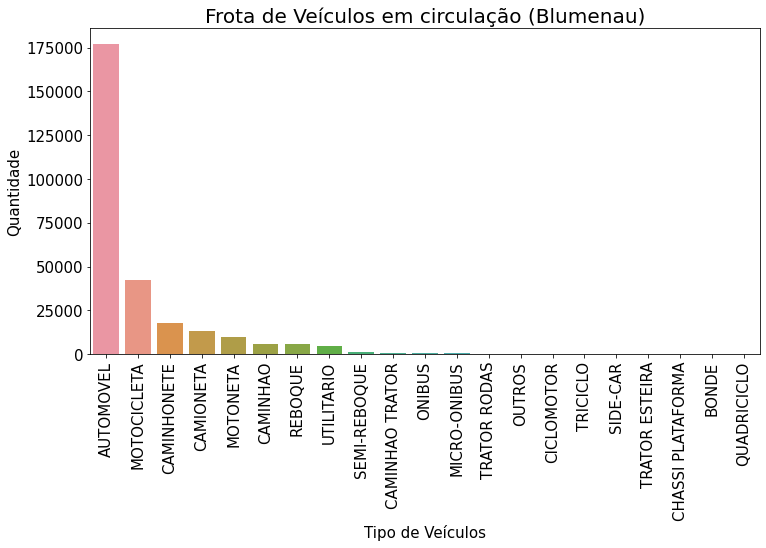

In [6]:
plt.figure(figsize=(12, 6))

sns.barplot(x='TIPO DE VEICULO', y='QUANTIDADE', data=df_frota_blumenau);

plt.xlabel('Tipo de Veículos', fontsize=15)
plt.xticks(rotation=90, fontsize=15)

plt.ylabel(f'Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Frota de Veículos em circulação (Blumenau)', fontsize=20)
plt.show();

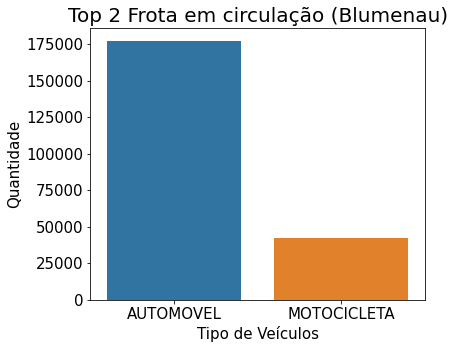

In [9]:
plt.figure(figsize=(6, 5))

sns.barplot(x='TIPO DE VEICULO', y='QUANTIDADE', data=df_AM);

plt.xlabel('Tipo de Veículos', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel(f'Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Top 2 Frota em circulação (Blumenau)', fontsize=20)
plt.show();

In [43]:
df_A_blu = df_frota.loc[('SC', 'BLUMENAU', ['2020-03-01', '2020-04-01', '2020-05-01', 
                                            '2020-06-01', '2020-07-01', '2020-08-01', 
                                            '2020-09-01', '2020-10-01', '2020-11-01'], 'AUTOMOVEL')]\
                   .reset_index()\
                   .sort_values('DATE', ascending=True)

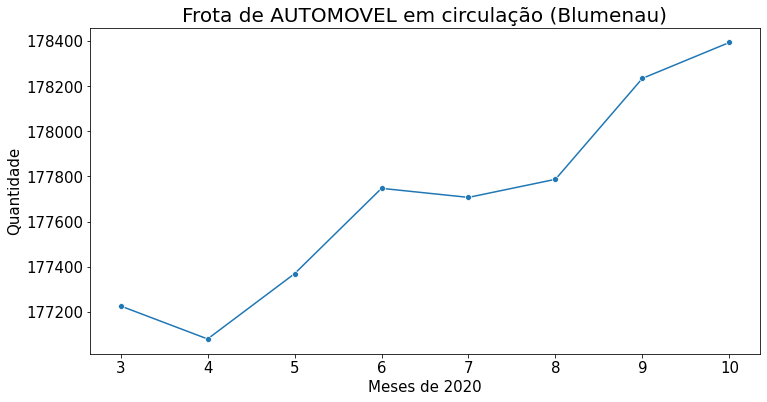

In [58]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=df_A_blu.DATE.dt.month, y='QUANTIDADE', data=df_A_blu, marker='o',);

plt.xlabel('Meses de 2020', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel(f'Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Frota de AUTOMOVEL em circulação (Blumenau)', fontsize=20)
plt.show();

In [59]:
df_M_blu = df_frota.loc[('SC', 'BLUMENAU', ['2020-03-01', '2020-04-01', '2020-05-01', 
                                            '2020-06-01', '2020-07-01', '2020-08-01', 
                                            '2020-09-01', '2020-10-01', '2020-11-01'], 'MOTOCICLETA')]\
                   .reset_index()\
                   .sort_values('DATE', ascending=True)

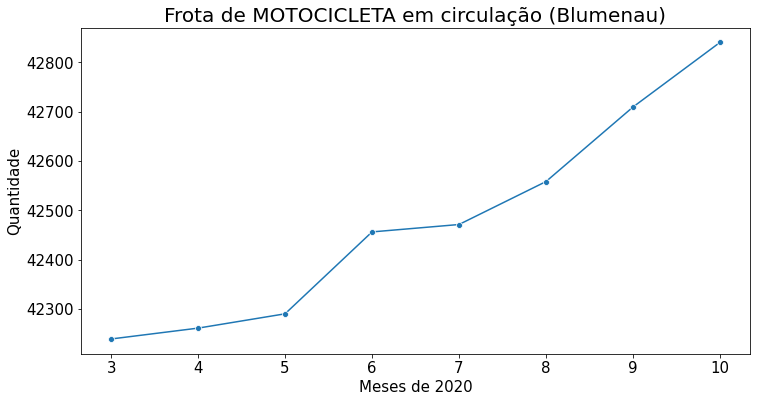

In [60]:
plt.figure(figsize=(12, 6))

sns.lineplot(x=df_A_blu.DATE.dt.month, y='QUANTIDADE', data=df_M_blu, marker='o',);

plt.xlabel('Meses de 2020', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel(f'Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Frota de MOTOCICLETA em circulação (Blumenau)', fontsize=20)
plt.show();